In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-data/customer_data.csv


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
print("HI")


HI


In [107]:
import os

# List files in the current directory
print(os.listdir('../input'))


['customer-data']


In [108]:
import pandas as pd

# Adjust the path based on the actual file name
data = pd.read_csv('../input/customer-data/customer_data.csv')
print(data.head())


   age  gender     location income_level  purchase_frequency  recency  \
0   25    Male     New York       Medium                   5       10   
1   32  Female  Los Angeles         High                   2       20   
2   47  Female      Chicago         High                   8        5   
3   51    Male      Houston       Medium                   1       60   
4   22  Female      Phoenix          Low                   3       30   

   total_spend browsing_categories preferred_brands  
0       300.50         Electronics           BrandA  
1       800.75            Clothing           BrandB  
2      1200.00                Home           BrandC  
3       400.00         Electronics           BrandA  
4       150.25                Toys           BrandD  


In [109]:
print(data.columns)

Index(['age', 'gender', 'location', 'income_level', 'purchase_frequency',
       'recency', 'total_spend', 'browsing_categories', 'preferred_brands'],
      dtype='object')


In [110]:
scaler = StandardScaler()
numerical_features = ['age', 'purchase_frequency', 'recency', 'total_spend']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


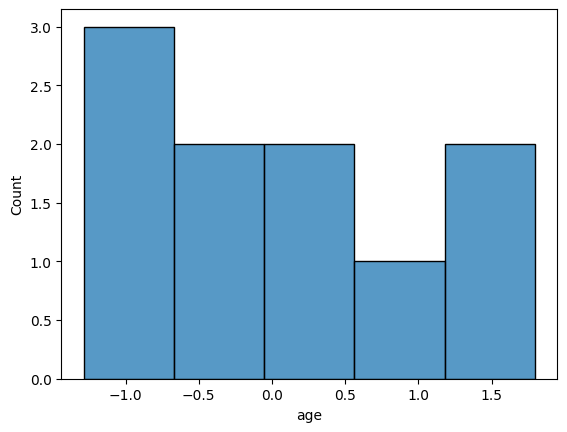

In [111]:
sns.histplot(data['age'])
plt.show()

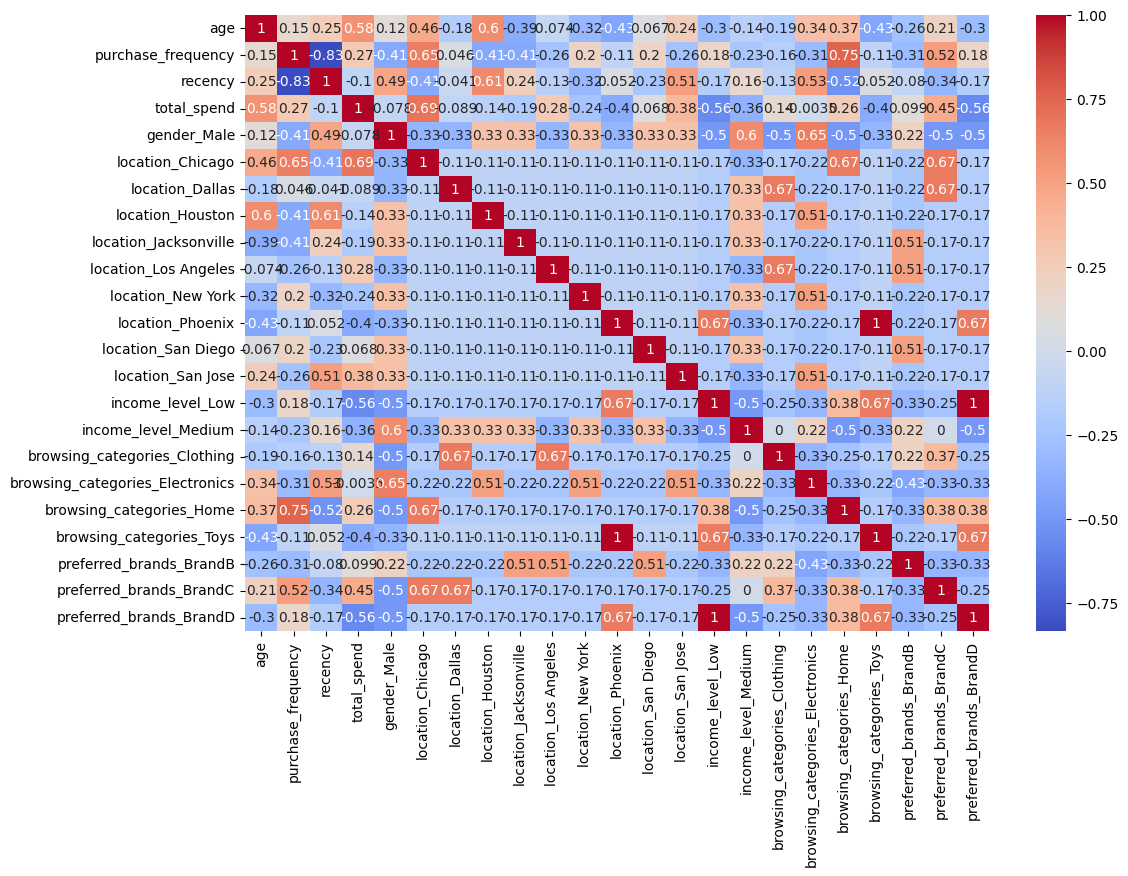

In [112]:
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'income_level', 'browsing_categories', 'preferred_brands'], drop_first=True)

# Plot a heatmap of the correlation matrix on the encoded data
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


In [113]:
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.show()

In [114]:
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'income_level', 'browsing_categories', 'preferred_brands'], drop_first=True)


In [138]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


In [115]:
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)  # Use data_encoded instead of data
    sse.append(kmeans.inertia_)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

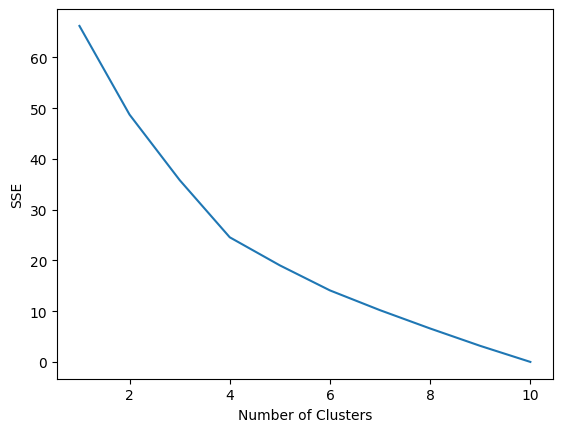

In [116]:
plt.plot(k_values, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [117]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_encoded['cluster'] = kmeans.fit_predict(data_encoded)  # Use data_encoded

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [118]:
score = silhouette_score(data_encoded, data_encoded['cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.16722713110228932


In [119]:
data['cluster'] = data_encoded['cluster']

In [120]:
numeric_columns = data.select_dtypes(include=['number'])

In [122]:
# Check the data types of your columns
print(data.dtypes)

# Select only numeric columns for cluster analysis
numeric_columns = data.select_dtypes(include=['number'])

# Perform the aggregation based on the clusters
cluster_analysis = data.groupby('cluster')[numeric_columns.columns].mean()
print(cluster_analysis)


age                    float64
gender                  object
location                object
income_level            object
purchase_frequency     float64
recency                float64
total_spend            float64
browsing_categories     object
preferred_brands        object
cluster                  int32
dtype: object
              age  purchase_frequency   recency  total_spend  cluster
cluster                                                              
0        0.768071           -0.927120  0.988035     0.515423      0.0
1       -0.612333            0.136788 -0.288640    -0.603737      1.0
2        1.369785            1.960631 -1.232269     2.076153      2.0


In [124]:
# Perform the aggregation based on the clusters
cluster_analysis = data.groupby('cluster')[numeric_columns.columns].mean()
print(cluster_analysis)


              age  purchase_frequency   recency  total_spend  cluster
cluster                                                              
0        0.768071           -0.927120  0.988035     0.515423      0.0
1       -0.612333            0.136788 -0.288640    -0.603737      1.0
2        1.369785            1.960631 -1.232269     2.076153      2.0


In [126]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assume 'data' is your DataFrame

# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'income_level', 'browsing_categories', 'preferred_brands'])

# Select only the numeric columns for clustering
numeric_data = data_encoded.select_dtypes(include=['number'])

# Initialize and fit the GMM model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
data_encoded['gmm_cluster'] = gmm.fit_predict(numeric_data)

# Check the resulting DataFrame
print(data_encoded.head())


        age  purchase_frequency   recency  total_spend  cluster  \
0 -0.966282            0.592749 -0.954731    -0.733004        1   
1 -0.222988           -0.775133 -0.399655     0.829287        0   
2  1.369785            1.960631 -1.232269     2.076153        2   
3  1.794524           -1.231094  1.820650    -0.422264        0   
4 -1.284837           -0.319173  0.155421    -1.202238        1   

   gender_Female  gender_Male  location_Austin  location_Chicago  \
0          False         True            False             False   
1           True        False            False             False   
2           True        False            False              True   
3          False         True            False             False   
4           True        False            False             False   

   location_Dallas  ...  browsing_categories_Books  \
0            False  ...                      False   
1            False  ...                      False   
2            False  ...   

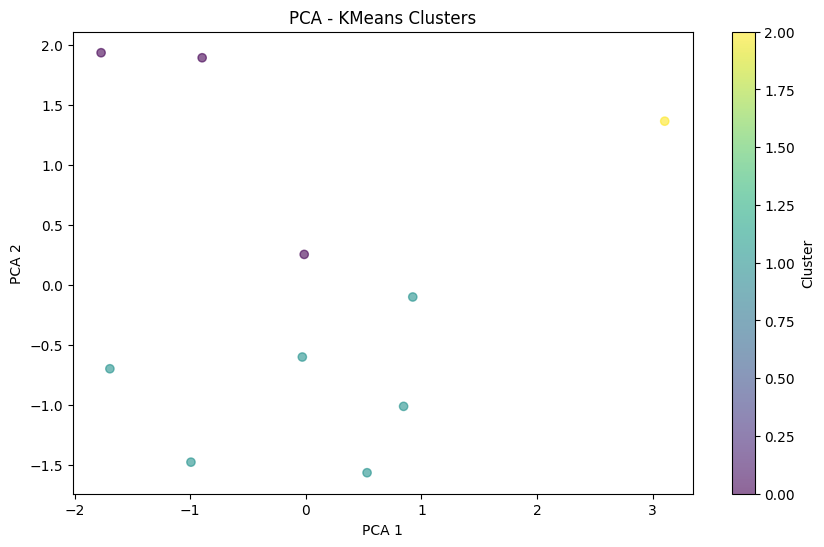

In [127]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data[numerical_features])

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA - KMeans Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()


In [130]:
print(data.columns)


Index(['age', 'gender', 'location', 'income_level', 'purchase_frequency',
       'recency', 'total_spend', 'browsing_categories', 'preferred_brands',
       'cluster'],
      dtype='object')


In [131]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=optimal_k, random_state=42)
data['gmm_cluster'] = gmm.fit_predict(data[numerical_features])


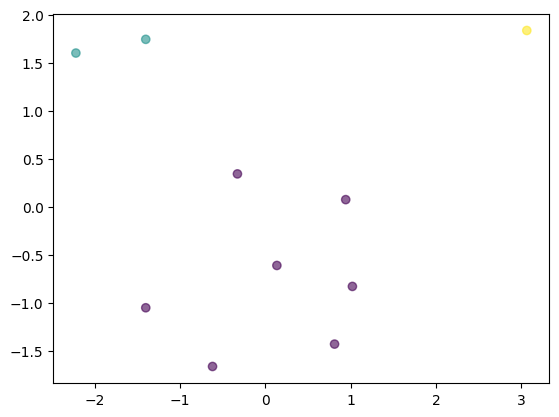

In [132]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['gmm_cluster'], cmap='viridis', alpha=0.6)


        age  purchase_frequency   recency  total_spend  cluster  gmm_cluster  \
0 -0.966282            0.592749 -0.954731    -0.733004        1            0   
1 -0.222988           -0.775133 -0.399655     0.829287        0            0   
2  1.369785            1.960631 -1.232269     2.076153        2            1   
3  1.794524           -1.231094  1.820650    -0.422264        0            2   
4 -1.284837           -0.319173  0.155421    -1.202238        1            0   

   gender_Male  location_Chicago  location_Dallas  location_Houston  ...  \
0         True             False            False             False  ...   
1        False             False            False             False  ...   
2        False              True            False             False  ...   
3         True             False            False              True  ...   
4        False             False            False             False  ...   

   location_San Jose  income_level_Low  income_level_Medium  \

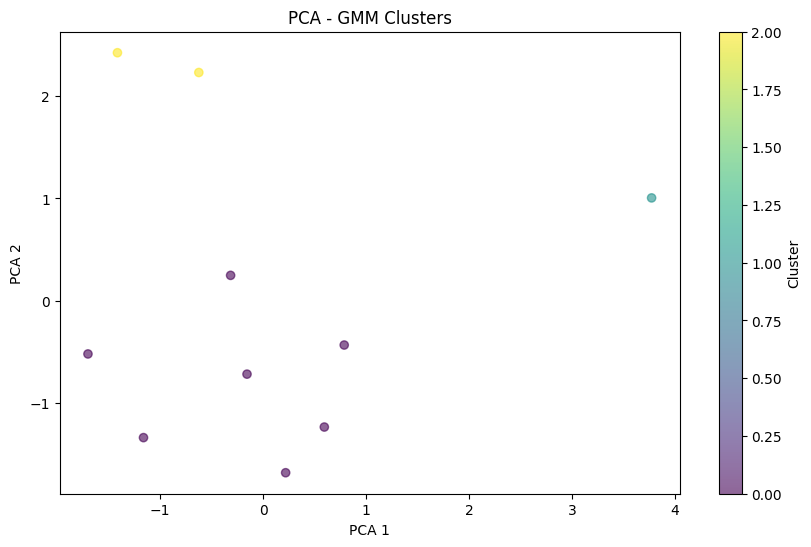

                  age  purchase_frequency   recency  total_spend   cluster  \
gmm_cluster                                                                  
0           -0.556712            0.006514 -0.304499    -0.399019  0.857143   
1            1.369785            1.960631 -1.232269     2.076153  2.000000   
2            1.263600           -1.003114  1.681880     0.358491  0.000000   

             gender_Male  location_Chicago  location_Dallas  location_Houston  \
gmm_cluster                                                                     
0               0.428571               0.0         0.142857               0.0   
1               0.000000               1.0         0.000000               0.0   
2               1.000000               0.0         0.000000               0.5   

             location_Jacksonville  ...  location_San Jose  income_level_Low  \
gmm_cluster                         ...                                        
0                         0.142857  ...    

In [134]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assume 'data' is your DataFrame
# Convert categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'income_level', 'browsing_categories', 'preferred_brands'], drop_first=True)

# Select only the numeric columns for clustering
numeric_data = data_encoded.select_dtypes(include=['number'])

# Initialize and fit the GMM model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
data_encoded['gmm_cluster'] = gmm.fit_predict(numeric_data)

# Check the resulting DataFrame
print(data_encoded.head())

# Perform PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(numeric_data)

# Create the scatter plot for GMM clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data_encoded['gmm_cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA - GMM Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

# Analyze GMM clusters
gmm_analysis = data_encoded.groupby('gmm_cluster').mean()
print(gmm_analysis)


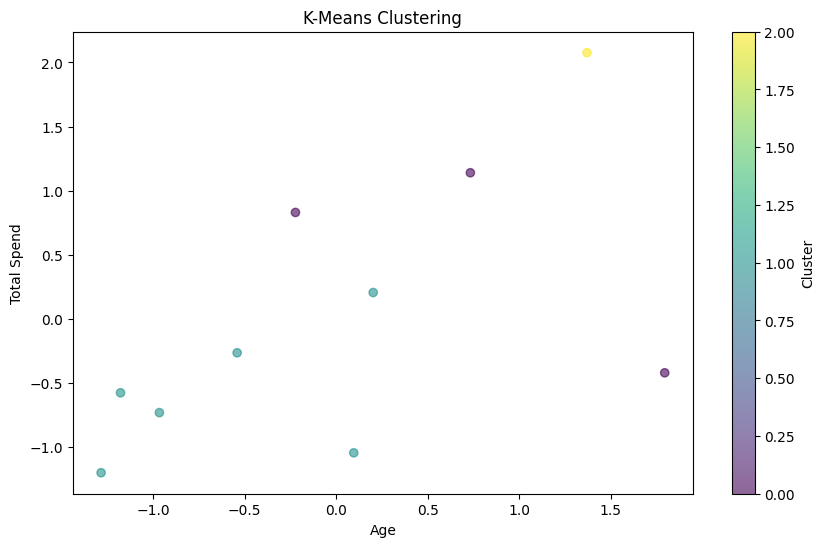

In [135]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['total_spend'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


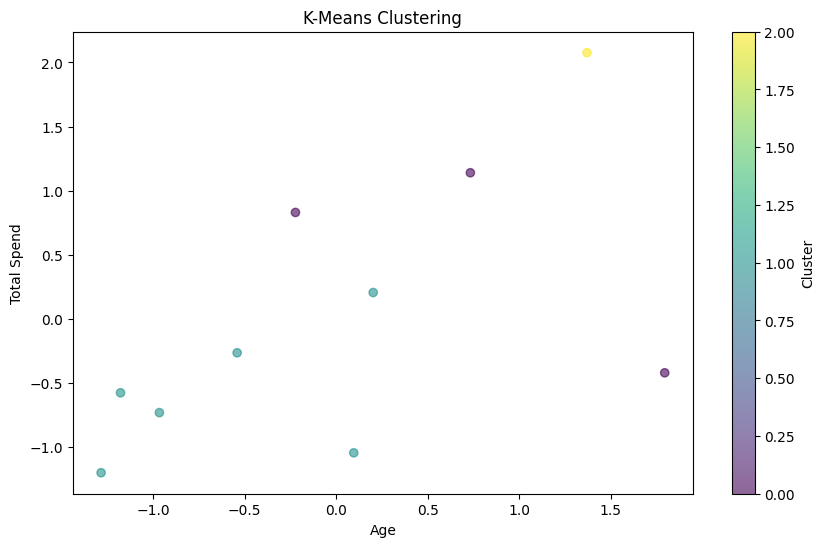

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['total_spend'], c=data['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Total Spend')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [148]:
# Profiling by preferred brands
brand_profile = data.groupby('cluster')[['preferred_brands_BrandA', 'preferred_brands_BrandB', 'preferred_brands_BrandC']].mean()
print(brand_profile)


         preferred_brands_BrandA  preferred_brands_BrandB  \
cluster                                                     
0                       0.666667                 0.333333   
1                       0.166667                 0.333333   
2                       0.000000                 0.000000   

         preferred_brands_BrandC  
cluster                           
0                       0.000000  
1                       0.166667  
2                       1.000000  


In [141]:
# Profiling by location
location_profile = data.groupby('cluster')['location'].value_counts(normalize=True).unstack().fillna(0)
print(location_profile)


location    Austin  Chicago    Dallas   Houston  Jacksonville  Los Angeles  \
cluster                                                                      
0         0.000000      0.0  0.000000  0.333333      0.000000     0.333333   
1         0.166667      0.0  0.166667  0.000000      0.166667     0.000000   
2         0.000000      1.0  0.000000  0.000000      0.000000     0.000000   

location  New York   Phoenix  San Diego  San Jose  
cluster                                            
0         0.000000  0.000000   0.000000  0.333333  
1         0.166667  0.166667   0.166667  0.000000  
2         0.000000  0.000000   0.000000  0.000000  


In [149]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

db_score = davies_bouldin_score(data[numerical_features], data['cluster'])
ch_score = calinski_harabasz_score(data[numerical_features], data['cluster'])

print(f'Davies-Bouldin Score: {db_score}')
print(f'Calinski-Harabasz Score: {ch_score}')


Davies-Bouldin Score: 0.750954960970697
Calinski-Harabasz Score: 6.455767734785286


In [150]:
cluster_comparison = pd.crosstab(data['cluster'], data['gmm_cluster'])
print(cluster_comparison)


gmm_cluster  0  1  2
cluster             
0            1  2  0
1            6  0  0
2            0  0  1


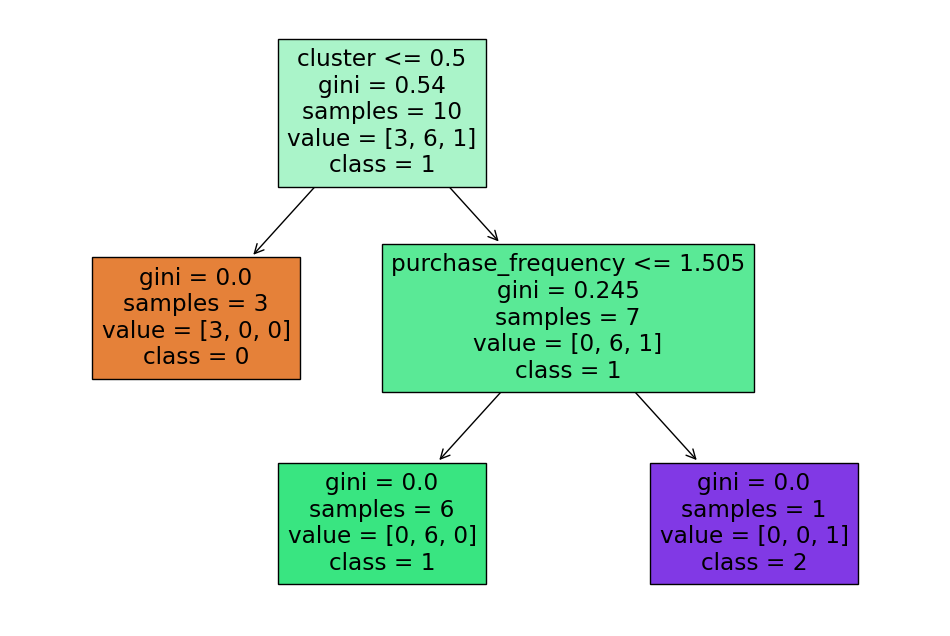

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(data[numerical_features], data['cluster'])

plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=numerical_features, class_names=[str(i) for i in range(optimal_k)], filled=True)
plt.show()


In [152]:
# Example: Basic Recommendation Logic
data['recommendation'] = data['cluster'].apply(lambda x: 'Premium Products' if x == 1 else 'Discount Products')


In [153]:
data.head()

,age,gender,location,income_level,purchase_frequency,recency,total_spend,browsing_categories,cluster,gmm_cluster,preferred_brands_BrandA,preferred_brands_BrandB,preferred_brands_BrandC,preferred_brands_BrandD,recommendation
0,-0.966282,Male,New York,Medium,0.592749,-0.954731,-0.733004,Electronics,1,0,True,False,False,False,Premium Products
1,-0.222988,Female,Los Angeles,High,-0.775133,-0.399655,0.829287,Clothing,0,0,False,True,False,False,Discount Products
2,1.369785,Female,Chicago,High,1.960631,-1.232269,2.076153,Home,2,2,False,False,True,False,Discount Products
3,1.794524,Male,Houston,Medium,-1.231094,1.820650,-0.422264,Electronics,0,1,True,False,False,False,Discount Products
4,-1.284837,Female,Phoenix,Low,-0.319173,0.155421,-1.202238,Toys,1,0,False,False,False,True,Premium Products
